In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt




In [2]:
# Rutas base
asociaciones_path = "base/asociaciones.json"
datos_pacientes_path = "base/datos_pacientes.sav"
carpeta_resultados = "resultados"



In [3]:
# Cargar asociaciones video -> nombre
with open(asociaciones_path, "r", encoding="utf-8") as f:
    asociaciones = json.load(f)



In [4]:
# Invertir: nombre -> video
nombre_a_video = {v.strip().upper(): k for k, v in asociaciones.items()}



In [5]:
# Leer archivo .sav con pandas
df = pd.read_spss(datos_pacientes_path)



In [6]:
# Normalizar nombre para hacer match
df["video"] = df["NOMBRE"].str.upper().map(nombre_a_video)
df["ppm_promedio"] = None



In [7]:
import glob

# === EXTRAER PPM DESDE JSON POR VIDEO ===
for idx, row in df.iterrows():
    video = row["video"]
    if pd.notna(video):
        video_name = os.path.splitext(video)[0]  # Quitar extensión .mp4
        carpeta_video = os.path.join(carpeta_resultados, video_name)
        
        # Buscar archivo que comience con 'resumen_fluidez_'
        posibles = glob.glob(os.path.join(carpeta_video, "resumen_fluidez_*.json"))
        if posibles:
            resumen_path = posibles[0]
            try:
                with open(resumen_path, "r", encoding="utf-8") as f:
                    resumen = json.load(f)
                    df.at[idx, "ppm_promedio"] = resumen.get("ppm_promedio")
            except Exception as e:
                print(f"⚠️ Error al procesar {resumen_path}: {e}")


# === CREAR NUEVO DATAFRAME SOLO CON NOMBRE, DNOpositivos Y PPM ===
df_salida = df[["NOMBRE", "PHESpositivo", "ppm_promedio"]].copy()

# === GUARDAR CSV DE RESULTADO ===
df_salida.to_csv("salida_ppm_por_paciente.csv", index=False, encoding="utf-8")
print("✅ Archivo generado: salida_ppm_por_paciente.csv")

df

✅ Archivo generado: salida_ppm_por_paciente.csv


,V1,GrupoTxACtrlBNAC,FECHAEVALUACIÓN,ECU,NOMBRE,SEXOM0F1,EDAD,FECHADENACIMIENTO,ESCOLARIDAD,ETIOLOGÍA,...,TRANSPLANTABLES,DNOpositivos,DNOpositivos16.5,DNOpositivos15.5,DNOpositivossinoutliers,s_ANT,VAR00001,grupo2,video,ppm_promedio
0,118.0,,1109/2023,NaN,ROSA ELVIRA AMARO VALENCIA,1.0,35.0,32129,16.0,,...,NaN,0.0,0.0,0.0,0.0,23.0,0.0,2.0,NaN,None
1,72.0,A,45042,NaN,RODRIGUEZ MANCERA MARIA GUADALUPE,1.0,59.0,23259,9.0,,...,NaN,1.0,1.0,1.0,1.0,12.0,0.0,2.0,video_00045.mp4,80.65
2,146.0,C,45211,NaN,MELCHI TEMICH MARTHA,1.0,32.0,33455,9.0,,...,NaN,0.0,0.0,0.0,0.0,24.0,0.0,2.0,NaN,None
3,156.0,C,45219,NaN,RESEDIZ PINEDA ESTEFANIA,1.0,30.0,33917,22.0,,...,NaN,0.0,0.0,0.0,0.0,25.0,0.0,2.0,NaN,None
4,7.0,C,29/08/2022,NaN,ERNESTINA GUADALUPE MUNOZ VAZQUEZ,1.0,62.0,21865,9.0,,...,NaN,1.0,1.0,1.0,1.0,12.0,1.0,2.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,162.0,C,45226,3947906.0,GROSTIETA HERNANDEZ ADRIAN,0.0,60.0,23177,12.0,OH,...,NaN,0.0,0.0,0.0,0.0,25.0,0.0,0.0,NaN,None
222,168.0,C,45230,3850478.0,COUTINO VILLAFUERTE CIELO GUADALUPE,1.0,48.0,27526,16.0,MASLD,...,NaN,0.0,0.0,0.0,0.0,21.0,0.0,0.0,NaN,None
223,109.0,C,45173,3848625.0,DIAZ VEGA ANGELICA,1.0,56.0,24463,9.0,MASLD,...,1.0,1.0,1.0,1.0,1.0,14.0,NaN,1.0,NaN,None
224,120.0,C,45181,1163711.0,ESCALONA DURAN HORTENCIA,1.0,57.0,24129,6.0,MASLD,...,0.0,0.0,0.0,0.0,1.0,18.0,NaN,1.0,NaN,None


In [8]:
df_final = df_salida[df_salida['ppm_promedio'].notna()]
df_final

,NOMBRE,PHESpositivo,ppm_promedio
1,RODRIGUEZ MANCERA MARIA GUADALUPE,0.0,80.65
7,MAXIMILIANO HERNANDEZ HERNANDEZ,0.0,41.26
8,GABRIEL GOMEZ LOPEZ,0.0,24.57
10,CELIA PEREZ VEGA,0.0,50.58
12,ESPERANZA VIVIANA LUGO FRAGOSO,0.0,6.48
...,...,...,...
211,SANCHEZ LUNA SONIA,0.0,34.71
212,HERNANDEZ ALEJANDRE ESTELA,0.0,34.22
216,GLORIA GONZALEZ MALDONADO,0.0,83.51
218,CARVAJAL MARTINEZ CLAUDIO,0.0,58.27


                                NOMBRE  PHESpositivo ppm_promedio grupo_label
1    RODRIGUEZ MANCERA MARIA GUADALUPE           0.0        80.65        Sano
7      MAXIMILIANO HERNANDEZ HERNANDEZ           0.0        41.26        Sano
8                  GABRIEL GOMEZ LOPEZ           0.0        24.57        Sano
10                    CELIA PEREZ VEGA           0.0        50.58        Sano
12      ESPERANZA VIVIANA LUGO FRAGOSO           0.0         6.48        Sano
..                                 ...           ...          ...         ...
211                 SANCHEZ LUNA SONIA           0.0        34.71        Sano
212         HERNANDEZ ALEJANDRE ESTELA           0.0        34.22        Sano
216          GLORIA GONZALEZ MALDONADO           0.0        83.51        Sano
218          CARVAJAL MARTINEZ CLAUDIO           0.0        58.27        Sano
225          RODRIGUEZ SANCHEZ MINERVA           0.0        40.54        Sano

[80 rows x 4 columns]


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\2883148887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["grupo_label"] = df_final["PHESpositivo"].map({0.0: "Sano", 1.0: "Enfermo"})
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\2883148887.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([grupo_sano, grupo_enfermo], labels=["Sano", "Enfermo"])


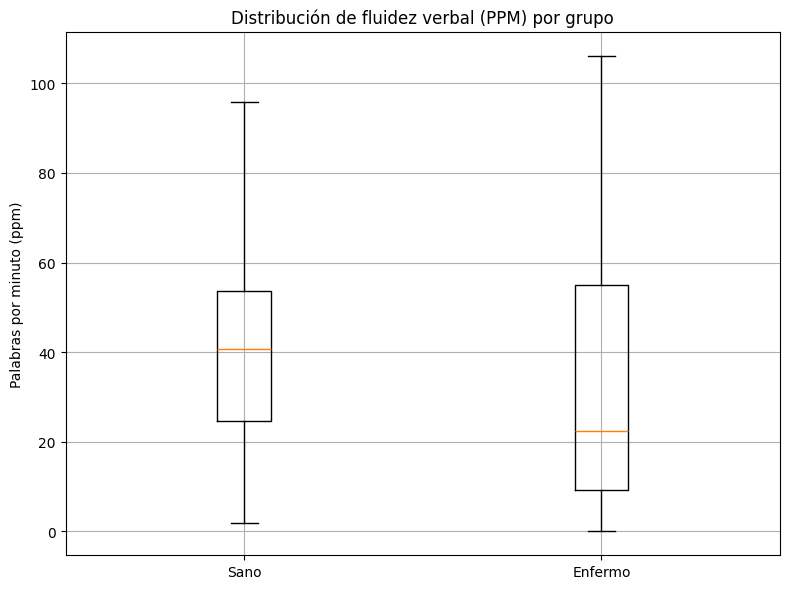

In [9]:
import matplotlib.pyplot as plt

# Convertir DNOpositivos en etiquetas legibles
df_final["grupo_label"] = df_final["PHESpositivo"].map({0.0: "Sano", 1.0: "Enfermo"})
print(df_final)
# Separar los grupos
grupo_sano = df_final[df_final["grupo_label"] == "Sano"]["ppm_promedio"]
grupo_enfermo = df_final[df_final["grupo_label"] == "Enfermo"]["ppm_promedio"]

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.boxplot([grupo_sano, grupo_enfermo], labels=["Sano", "Enfermo"])
plt.ylabel("Palabras por minuto (ppm)")
plt.title("Distribución de fluidez verbal (PPM) por grupo")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\2786847828.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x="grupo_label", y="ppm_promedio", palette=["#8fd694", "#f28e8e"])


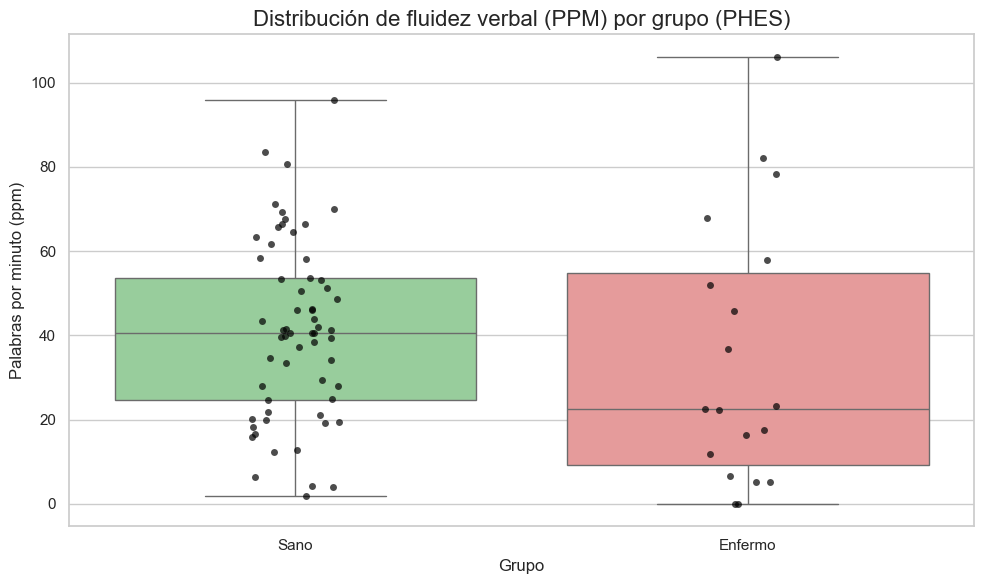

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar estilo visual bonito
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar caja con puntos individuales
sns.boxplot(data=df_final, x="grupo_label", y="ppm_promedio", palette=["#8fd694", "#f28e8e"])
sns.stripplot(data=df_final, x="grupo_label", y="ppm_promedio", 
              jitter=True, color="black", size=5, alpha=0.7)

# Etiquetas
plt.title("Distribución de fluidez verbal (PPM) por grupo (PHES)", fontsize=16)
plt.xlabel("Grupo", fontsize=12)
plt.ylabel("Palabras por minuto (ppm)", fontsize=12)

# Mostrar
plt.tight_layout()
plt.savefig("grafica_fluidez_phes.png", dpi=300)
plt.show()


In [11]:
import pandas as pd
import json
import os
import glob

# === RUTAS BASE ===
asociaciones_path = "base/asociaciones.json"
sav_path = "base/datos_pacientes.sav"
carpeta_resultados = "resultados"

# === CARGAR ASOCIACIONES ===
with open(asociaciones_path, "r", encoding="utf-8") as f:
    asociaciones = json.load(f)

nombre_a_video = {v.strip().upper(): k for k, v in asociaciones.items()}

# === CARGAR ARCHIVO SAV ===
df = pd.read_spss(sav_path)
df["video"] = df["NOMBRE"].str.upper().map(nombre_a_video)

# === CAMPOS A AGREGAR DESDE JSON ===
campos_json = [
    "tiempo_inicio", "tiempo_final", "total_palabras", "ppm_promedio", 
    "desviacion_estandar", "ppm_final", "animales", 
    "conteo_por_grupo", "grupos_semanticos"
]
for campo in campos_json:
    df[campo] = None

# === EXTRAER DATOS DEL JSON ===
for idx, row in df.iterrows():
    video = row["video"]
    if pd.notna(video):
        video_name = os.path.splitext(video)[0]
        carpeta_video = os.path.join(carpeta_resultados, video_name)
        posibles = glob.glob(os.path.join(carpeta_video, "resumen_fluidez_*.json"))
        if posibles:
            resumen_path = posibles[0]
            try:
                with open(resumen_path, "r", encoding="utf-8") as f:
                    resumen = json.load(f)
                    for campo in campos_json:
                        df.at[idx, campo] = resumen.get(campo)
            except Exception as e:
                print(f"⚠️ Error al procesar {resumen_path}: {e}")

# === GUARDAR COMO EXCEL ===
df = df[df['video'].notna()]
df.to_excel("resultado_fluidez_completo.xlsx", index=False)
print("✅ Archivo Excel generado: resultado_fluidez_completo.xlsx")


✅ Archivo Excel generado: resultado_fluidez_completo.xlsx


                                NOMBRE  PHESpositivo ppm_promedio grupo_label
1    RODRIGUEZ MANCERA MARIA GUADALUPE           0.0        80.65        Sano
7      MAXIMILIANO HERNANDEZ HERNANDEZ           0.0        41.26        Sano
8                  GABRIEL GOMEZ LOPEZ           0.0        24.57        Sano
10                    CELIA PEREZ VEGA           0.0        50.58        Sano
12      ESPERANZA VIVIANA LUGO FRAGOSO           0.0         6.48        Sano
..                                 ...           ...          ...         ...
211                 SANCHEZ LUNA SONIA           0.0        34.71        Sano
212         HERNANDEZ ALEJANDRE ESTELA           0.0        34.22        Sano
216          GLORIA GONZALEZ MALDONADO           0.0        83.51        Sano
218          CARVAJAL MARTINEZ CLAUDIO           0.0        58.27        Sano
225          RODRIGUEZ SANCHEZ MINERVA           0.0        40.54        Sano

[80 rows x 4 columns]


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\2248733898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["grupo_label"] = df["PHESpositivo"].map({0.0: "Sano", 1.0: "Enfermo"})
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\2248733898.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([grupo_sano, grupo_enfermo], labels=["Sano", "Enfermo"])


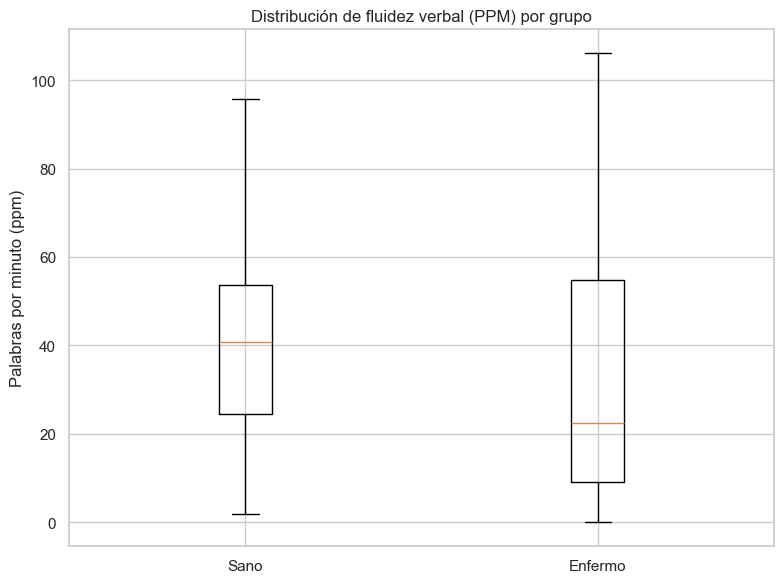

In [12]:
import matplotlib.pyplot as plt

# Convertir DNOpositivos en etiquetas legibles
df_final["grupo_label"] = df["PHESpositivo"].map({0.0: "Sano", 1.0: "Enfermo"})
print(df_final)
# Separar los grupos
grupo_sano = df_final[df_final["grupo_label"] == "Sano"]["ppm_promedio"]
grupo_enfermo = df_final[df_final["grupo_label"] == "Enfermo"]["ppm_promedio"]

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.boxplot([grupo_sano, grupo_enfermo], labels=["Sano", "Enfermo"])
plt.ylabel("Palabras por minuto (ppm)")
plt.title("Distribución de fluidez verbal (PPM) por grupo")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# for col in df.columns:
#     print(col)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Estilo visual
sns.set(style="whitegrid")

# Convertir PHESpositivo en texto
df["grupo_label"] = df["PHESpositivo"].map({0.0: "Sano", 1.0: "Enfermo"})

# Campos numéricos a graficar
campos_a_graficar = [
    "ppm_promedio", "ppm_final", "desviacion_estandar",
    "tiempo_inicio", "tiempo_final", "total_palabras"
]

# Crear PDF
with PdfPages("graficas_resumen_phes.pdf") as pdf:
    for campo in campos_a_graficar:
        if campo in df.columns:
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df, x="grupo_label", y=campo, palette=["#8fd694", "#f28e8e"])
            sns.stripplot(data=df, x="grupo_label", y=campo, 
                          jitter=True, color="black", size=5, alpha=0.7)
            plt.title(f"Distribución de {campo.replace('_', ' ').title()} por Grupo PHES", fontsize=14)
            plt.xlabel("Grupo", fontsize=12)
            plt.ylabel(campo.replace("_", " ").title(), fontsize=12)
            plt.tight_layout()
            pdf.savefig()  # Guardar figura actual en el PDF
            plt.close()

print("✅ PDF generado: graficas_resumen_phes.pdf")


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\3001804245.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="grupo_label", y=campo, palette=["#8fd694", "#f28e8e"])
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\3001804245.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="grupo_label", y=campo, palette=["#8fd694", "#f28e8e"])
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\3001804245.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="grupo_label", y=campo, palette=["#8fd694", "#f28e8e"])
C:\U

✅ PDF generado: graficas_resumen_phes.pdf


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Clasificación según tus reglas
def clasificar_grupo(row):
    if row["ETIOLOGÍA"] == "nada" and row["PHESpositivo"] == 0:
        return "control"
    elif row["ETIOLOGÍA"] != "nada" and row["PHESpositivo"] == 0:
        return "cirrosis"
    elif row["ETIOLOGÍA"] != "nada" and row["PHESpositivo"] == 1:
        return "encefalopatía"
    else:
        return None  # nada y PHES positivo → eliminar

# Aplicar lógica
df["grupo"] = df.apply(clasificar_grupo, axis=1)
df_filtrado = df[df["grupo"].notna()]  # Eliminar "sacar de la base"

# Lista de campos numéricos del resumen
campos_a_graficar = [
    "ppm_promedio", "ppm_final", "desviacion_estandar",
    "tiempo_inicio", "tiempo_final", "total_palabras"
]

# Estilo
sns.set(style="whitegrid")

# PDF de salida
with PdfPages("graficas_resumen_por_grupo.pdf") as pdf:
    for campo in campos_a_graficar:
        if campo in df_filtrado.columns:
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df_filtrado, x="grupo", y=campo,
                        order=["control", "cirrosis", "encefalopatía"],
                        palette=["#8fd694", "#fdd56d", "#f28e8e"])
            sns.stripplot(data=df_filtrado, x="grupo", y=campo,
                          order=["control", "cirrosis", "encefalopatía"],
                          jitter=True, color="black", size=5, alpha=0.6)
            plt.title(f"{campo.replace('_', ' ').title()} por grupo clínico", fontsize=14)
            plt.xlabel("Grupo")
            plt.ylabel(campo.replace("_", " ").title())
            plt.tight_layout()
            pdf.savefig()
            plt.close()

print("✅ PDF generado: graficas_resumen_por_grupo.pdf")


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\3006195027.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x="grupo", y=campo,
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\3006195027.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x="grupo", y=campo,
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\3006195027.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x="grupo", y=campo,
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\3006195027.py:34: FutureWarning: 

Passin

✅ PDF generado: graficas_resumen_por_grupo.pdf


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Función para clasificar según reglas
def clasificar_por_grupo(row):
    etiologia = str(row["ETIOLOGÍA"]).strip().lower()
    phes = row["PHESpositivo"]

    if etiologia in ["", "nada"] and phes == 0:
        return "control"
    elif etiologia not in ["", "nada"] and phes == 0:
        return "cirrosis"
    elif etiologia not in ["", "nada"] and phes == 1:
        return "encefalopatía"
    else:
        return None  # excluir

# Aplicar clasificación
df["grupo"] = df.apply(clasificar_por_grupo, axis=1)
df_filtrado = df[df["grupo"].notna()].copy()

# Campos numéricos del resumen
campos_a_graficar = [
    "ppm_promedio", "ppm_final", "desviacion_estandar",
    "tiempo_inicio", "tiempo_final", "total_palabras"
]

# Estilo gráfico
sns.set(style="whitegrid")

# Crear PDF con una gráfica por campo
with PdfPages("graficas_clasificadas_por_grupo.pdf") as pdf:
    for campo in campos_a_graficar:
        if campo in df_filtrado.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df_filtrado, x="grupo", y=campo,
                        order=["control", "cirrosis", "encefalopatía"],
                        palette=["#8fd694", "#fdd56d", "#f28e8e"])
            sns.stripplot(data=df_filtrado, x="grupo", y=campo,
                          order=["control", "cirrosis", "encefalopatía"],
                          jitter=True, color="black", size=4, alpha=0.6)
            plt.title(f"{campo.replace('_', ' ').title()} por grupo clínico", fontsize=14)
            plt.xlabel("Grupo")
            plt.ylabel(campo.replace("_", " ").title())
            plt.tight_layout()
            pdf.savefig()
            plt.close()

print("✅ PDF generado: graficas_clasificadas_por_grupo.pdf")


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\321719638.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x="grupo", y=campo,
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\321719638.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x="grupo", y=campo,
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\321719638.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x="grupo", y=campo,
C:\Users\luken\AppData\Local\Temp\ipykernel_18260\321719638.py:37: FutureWarning: 

Passing `p

✅ PDF generado: graficas_clasificadas_por_grupo.pdf


In [17]:
import pandas as pd
import json
import os
import glob

# === RUTAS ===
asociaciones_path = "base/asociaciones.json"
sav_path = "base/datos_pacientes.sav"
carpeta_resultados = "resultados"

# === CARGAR ASOCIACIONES ===
with open(asociaciones_path, "r", encoding="utf-8") as f:
    asociaciones = json.load(f)
nombre_a_video = {v.strip().upper(): k for k, v in asociaciones.items()}

# === CARGAR ARCHIVO .SAV ===
df = pd.read_spss(sav_path)
df["video"] = df["NOMBRE"].str.upper().map(nombre_a_video)

# === CAMPOS DEL RESUMEN A EXTRAER ===
campos_json = [
    "tiempo_inicio", "tiempo_final", "total_palabras", "ppm_promedio", 
    "desviacion_estandar", "ppm_final", "animales", 
    "conteo_por_grupo", "grupos_semanticos"
]
for campo in campos_json:
    df[campo] = None

# === EXTRAER RESUMEN POR PACIENTE ===
for idx, row in df.iterrows():
    video = row["video"]
    if pd.notna(video):
        video_name = os.path.splitext(video)[0]
        carpeta_video = os.path.join(carpeta_resultados, video_name)
        posibles = glob.glob(os.path.join(carpeta_video, "resumen_fluidez_*.json"))
        if posibles:
            resumen_path = posibles[0]
            try:
                with open(resumen_path, "r", encoding="utf-8") as f:
                    resumen = json.load(f)
                    for campo in campos_json:
                        df.at[idx, campo] = resumen.get(campo)
            except Exception as e:
                print(f"⚠️ Error al procesar {resumen_path}: {e}")

# === CLASIFICAR EN GRUPOS CLÍNICOS SEGÚN ETIOLOGÍA Y PHES ===
def clasificar_grupo(row):
    etiologia = str(row["ETIOLOGÍA"]).strip().lower()
    phes = row["PHESpositivo"]
    if etiologia in ["", "nada"] and phes == 0:
        return "CONTROL"
    elif etiologia not in ["", "nada"] and phes == 0:
        return "CIRROSIS"
    elif etiologia not in ["", "nada"] and phes == 1:
        return "ENCEFALOPATÍA"
    else:
        return None  # descartar si etiología está vacía y PHESpositivo es 1

df["grupo"] = df.apply(clasificar_grupo, axis=1)
df_final = df[df["grupo"].notna()].copy()

# === SELECCIONAR COLUMNAS FINALES ===
columnas_finales = ["video", "NOMBRE", "ETIOLOGÍA", "PHESpositivo", "grupo"] + campos_json
df_resultado = df_final[columnas_finales].copy()

# === GUARDAR COMO EXCEL ===
df_resultado.to_excel("datos_completos_clasificados.xlsx", index=False)
print("✅ Archivo generado: datos_completos_clasificados.xlsx")


✅ Archivo generado: datos_completos_clasificados.xlsx


In [18]:
df_resultado = df_resultado[df_resultado['ppm_promedio'].notna()]
df_resultado

,video,NOMBRE,ETIOLOGÍA,PHESpositivo,grupo,tiempo_inicio,tiempo_final,total_palabras,ppm_promedio,desviacion_estandar,ppm_final,animales,conteo_por_grupo,grupos_semanticos
1,video_00045.mp4,RODRIGUEZ MANCERA MARIA GUADALUPE,,0.0,CONTROL,0.0,53.19,11,80.65,95.15,12.41,"[perro, gato, elefante, tigre, poma, pájaros, ...",{},{}
7,video_00030.mp4,MAXIMILIANO HERNANDEZ HERNANDEZ,,0.0,CONTROL,0.0,47.12,11,41.26,36.53,14.01,"[perro, gato, ratón, hipopótamos, alfa león, p...","{'domésticos': 2, 'aves': 4, 'salvajes': 3, 'm...","{'domésticos': ['perro', 'gato'], 'aves': ['co..."
8,video_00025.mp4,GABRIEL GOMEZ LOPEZ,,0.0,CONTROL,0.0,58.46,18,24.57,8.89,18.47,"[elefante, tiburón, gato, perro, cuaches, mosc...","{'domésticos': 2, 'aves': 3, 'salvajes': 7}","{'domésticos': ['perro', 'gato'], 'aves': ['co..."
10,video_00012.mp4,CELIA PEREZ VEGA,,0.0,CONTROL,0.0,51.54,20,50.58,33.3,23.28,"[gallina, perro, gato, guacolote, pollito, can...","{'domésticos': 2, 'aves': 6, 'salvajes': 4, 'm...","{'domésticos': ['perro', 'gato'], 'aves': ['co..."
12,video_00003.mp4,ESPERANZA VIVIANA LUGO FRAGOSO,,0.0,CONTROL,0.0,9.26,2,6.48,6.48,12.96,"[tortugas, tiburones]","{'marinos': 1, 'salvajes': 3}","{'marinos': ['tiburones'], 'salvajes': ['león'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,video_00034.mp4,SANCHEZ LUNA SONIA,CBP,0.0,CIRROSIS,0.0,9.83,5,34.71,21.61,30.52,"[león, araña, tigre, saurio, tiburón]",{},{}
212,video_00029.mp4,HERNANDEZ ALEJANDRE ESTELA,MASLD,0.0,CIRROSIS,0.0,45.02,8,34.22,21.35,10.66,"[perro, cagallo, león, tigre, gato, patos, cab...","{'domésticos': 3, 'aves': 1, 'salvajes': 3}","{'domésticos': ['perro', 'gato', 'caballo'], '..."
216,video_00060.mp4,GLORIA GONZALEZ MALDONADO,MASLD,0.0,CIRROSIS,0.0,51.1,19,83.51,60.01,22.31,"[oso, perro, gato, león, jirafa, elefante, cha...","{'domésticos': 2, 'aves': 0, 'salvajes': 8, 'm...","{'domésticos': ['perro', 'gato'], 'aves': [], ..."
218,video_00002.mp4,CARVAJAL MARTINEZ CLAUDIO,VHC,0.0,CIRROSIS,0.0,50.17,22,58.27,60.81,26.31,"[perro, gato, gorrión, tigre, leona, pantera, ...","{'domésticos': 2, 'aves': 2, 'salvajes': 6, 'm...","{'domésticos': ['perro', 'gato'], 'aves': ['go..."


In [19]:
conteo_por_grupo = df_resultado["grupo"].value_counts()
print(conteo_por_grupo)



grupo
CIRROSIS         38
CONTROL          23
ENCEFALOPATÍA    16
Name: count, dtype: int64



📦 Generando boxplots con anotaciones de p-value y *...


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\1880420932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


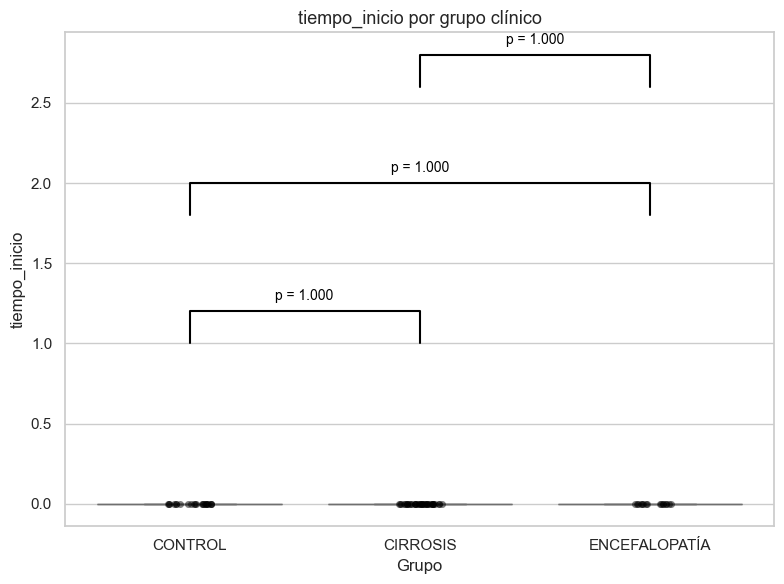

📦 Boxplot de 'tiempo_inicio' guardado en PDF.


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\1880420932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


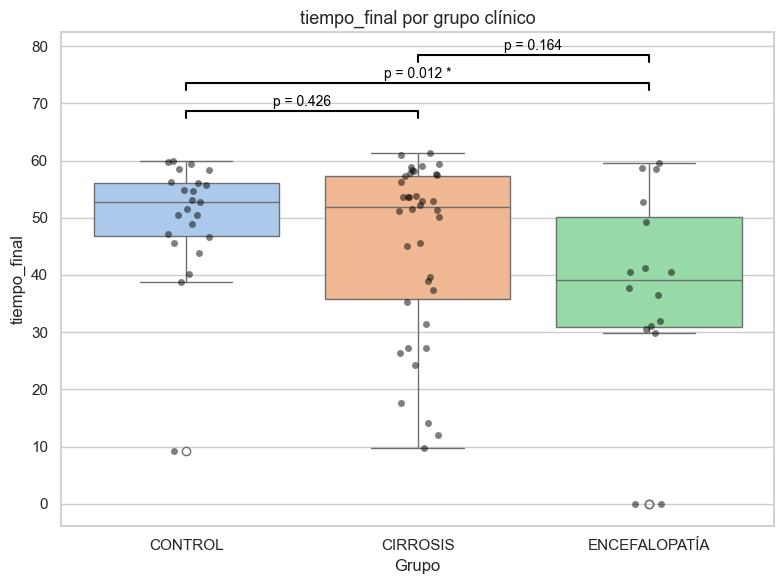

📦 Boxplot de 'tiempo_final' guardado en PDF.


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\1880420932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


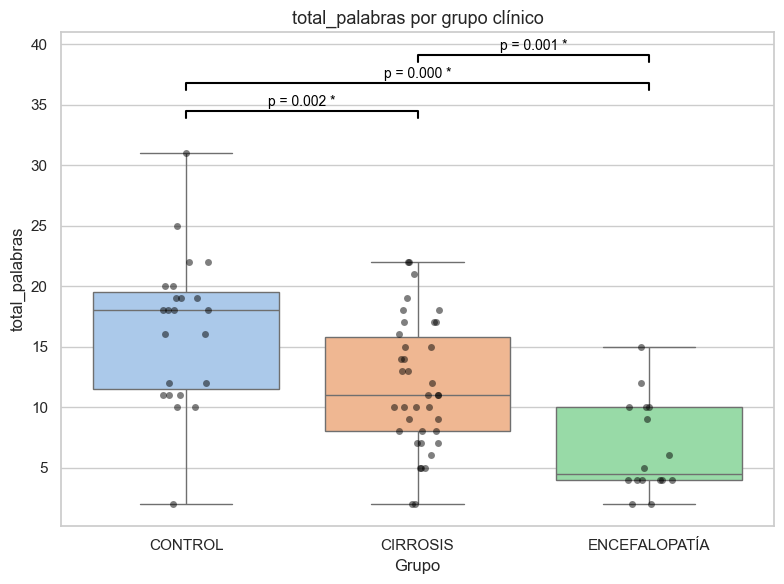

📦 Boxplot de 'total_palabras' guardado en PDF.


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\1880420932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


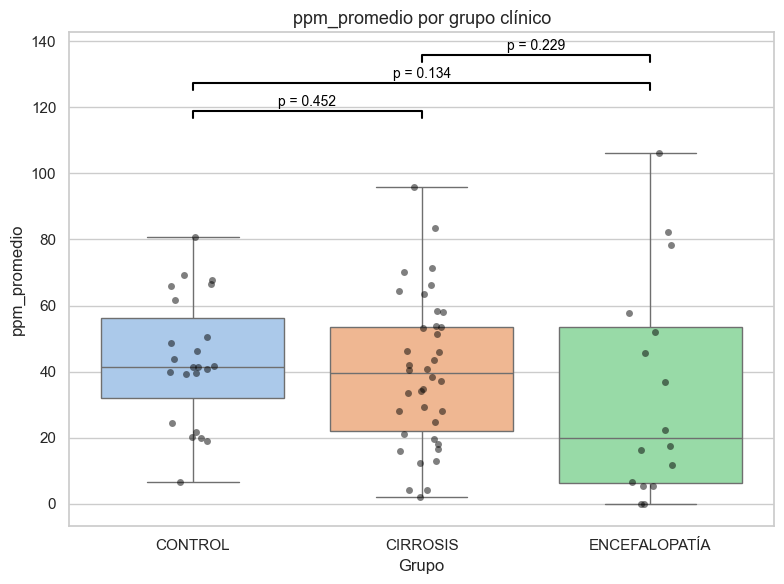

📦 Boxplot de 'ppm_promedio' guardado en PDF.


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\1880420932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


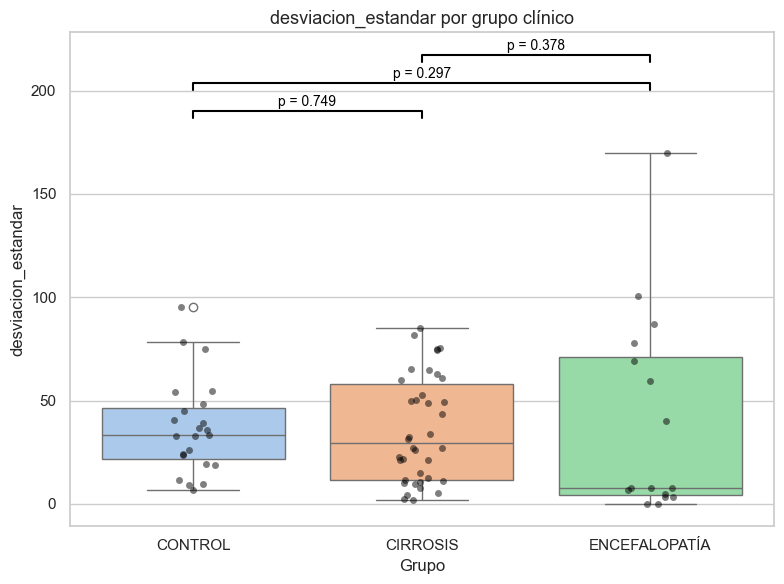

📦 Boxplot de 'desviacion_estandar' guardado en PDF.


C:\Users\luken\AppData\Local\Temp\ipykernel_18260\1880420932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


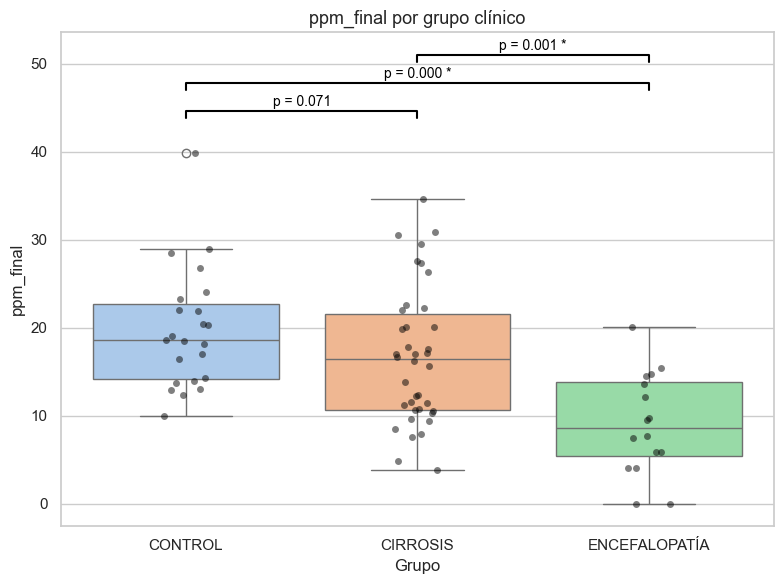

📦 Boxplot de 'ppm_final' guardado en PDF.


TypeError: unhashable type: 'list'

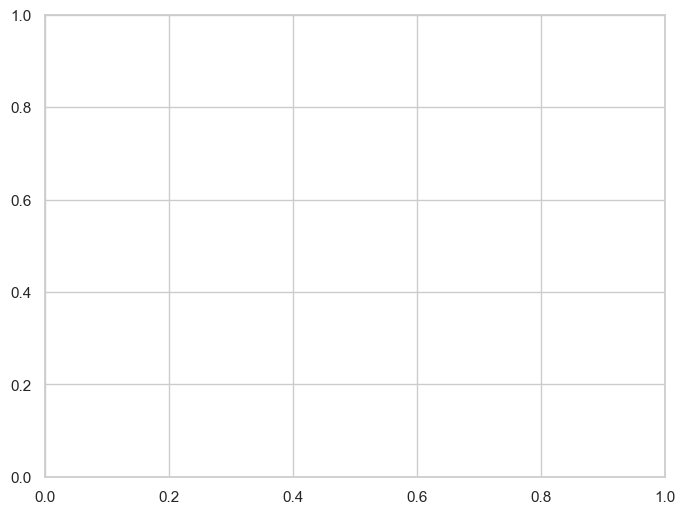

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu
from matplotlib.backends.backend_pdf import PdfPages

# === CONFIGURACIÓN ===
campos_json = [
    "tiempo_inicio", "tiempo_final", "total_palabras", "ppm_promedio", 
    "desviacion_estandar", "ppm_final", "animales", 
    "conteo_por_grupo", "grupos_semanticos"
]

grupos = df_resultado["grupo"].dropna().unique()
pares = list(combinations(grupos, 2))
sns.set(style="whitegrid")

print("\n📦 Generando boxplots con anotaciones de p-value y *...")

with PdfPages("boxplots_comparacion.pdf") as pdf:
    for campo in campos_json:
        datos_plot = df_resultado[["grupo", campo]].dropna()
        if datos_plot.empty:
            continue

        plt.figure(figsize=(8, 6))
        ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")
        sns.stripplot(data=datos_plot, x="grupo", y=campo, color='black', alpha=0.5, jitter=True, dodge=True)

        y_max = datos_plot[campo].max()
        y_min = datos_plot[campo].min()
        altura = (y_max - y_min) * 0.1 if y_max > y_min else 1.0
        offset = y_max + altura

        for i, (g1, g2) in enumerate(pares):
            datos1 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g1][campo], errors="coerce").dropna()
            datos2 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g2][campo], errors="coerce").dropna()

            # datos1 = df_resultado[df_resultado["grupo"] == g1][campo].dropna()
            # datos2 = df_resultado[df_resultado["grupo"] == g2][campo].dropna()

            if len(datos1) > 0 and len(datos2) > 0:
                stat, p_val = mannwhitneyu(datos1, datos2, alternative="two-sided")
                x1, x2 = sorted([g1, g2], key=lambda x: list(grupos).index(x))
                x_pos1 = list(grupos).index(x1)
                x_pos2 = list(grupos).index(x2)

                h = offset + i * altura * 0.8
                ax.plot([x_pos1, x_pos1, x_pos2, x_pos2],
                        [h, h + altura * 0.2, h + altura * 0.2, h],
                        lw=1.5, c='black')

                etiqueta = f"p = {p_val:.3f}"
                if p_val < 0.05:
                    etiqueta += " *"

                ax.text((x_pos1 + x_pos2) / 2, h + altura * 0.25, etiqueta,
                        ha='center', va='bottom', color='black', fontsize=10)

        plt.title(f"{campo} por grupo clínico", fontsize=13)
        plt.xlabel("Grupo")
        plt.ylabel(campo)
        plt.tight_layout()
        pdf.savefig()  # Guardar en PDF
        plt.show()
        print(f"📦 Boxplot de '{campo}' guardado en PDF.")

print("✅ Todos los boxplots han sido guardados en 'boxplots_comparacion.pdf'")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu
from matplotlib.backends.backend_pdf import PdfPages

# === CONFIGURACIÓN ===
campos_json = [
    "tiempo_inicio", "tiempo_final", "total_palabras", "ppm_promedio", 
    "desviacion_estandar", "ppm_final"
    # , "animales", 
    # "conteo_por_grupo", "grupos_semanticos"
]

# Asegúrate de tener cargado tu DataFrame con el nombre df_resultado
# df_resultado = pd.read_csv("tu_archivo.csv")

grupos = df_resultado["grupo"].dropna().unique()
pares = list(combinations(grupos, 2))
sns.set(style="whitegrid")

# === PDF de boxplots con p-value ===
print("\n📦 Generando boxplots con anotaciones de p-value...")

with PdfPages("boxplots_comparacion.pdf") as pdf:
    for campo in campos_json:
        datos_plot = df_resultado[["grupo", campo]].dropna()
        if datos_plot.empty:
            continue

        plt.figure(figsize=(8, 6))
        ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")
        sns.stripplot(data=datos_plot, x="grupo", y=campo, color='black', alpha=0.5, jitter=True, dodge=True)

        y_max = datos_plot[campo].max()
        y_min = datos_plot[campo].min()
        altura = (y_max - y_min) * 0.1 if y_max > y_min else 1.0
        offset = y_max + altura

        for i, (g1, g2) in enumerate(pares):
            datos1 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g1][campo], errors="coerce").dropna()
            datos2 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g2][campo], errors="coerce").dropna()

            if len(datos1) > 0 and len(datos2) > 0:
                stat, p_val = mannwhitneyu(datos1, datos2, alternative="two-sided")
                x1, x2 = sorted([g1, g2], key=lambda x: list(grupos).index(x))
                x_pos1 = list(grupos).index(x1)
                x_pos2 = list(grupos).index(x2)

                h = offset + i * altura * 0.8
                ax.plot([x_pos1, x_pos1, x_pos2, x_pos2],
                        [h, h + altura * 0.2, h + altura * 0.2, h],
                        lw=1.5, c='black')

                etiqueta = f"p = {p_val:.3f}"
                if p_val < 0.05:
                    etiqueta += " *"

                ax.text((x_pos1 + x_pos2) / 2, h + altura * 0.25, etiqueta,
                        ha='center', va='bottom', color='black', fontsize=10)

        plt.title(f"{campo} por grupo clínico", fontsize=13)
        plt.xlabel("Grupo")
        plt.ylabel(campo)
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        print(f"📦 Boxplot de '{campo}' guardado.")

print("✅ Todos los boxplots han sido guardados en 'boxplots_comparacion.pdf'")

# === EXPORTAR MEDIANA + p-VALUE ENTRE GRUPOS ===
resultados = []

for campo in campos_json:
    for g1, g2 in pares:
        datos1 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g1][campo], errors="coerce").dropna()
        datos2 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g2][campo], errors="coerce").dropna()

        if len(datos1) > 0 and len(datos2) > 0:
            stat, p_val = mannwhitneyu(datos1, datos2, alternative="two-sided")
            resultados.append({
                "campo": campo,
                "grupo_1": g1,
                "grupo_2": g2,
                "mediana_1": datos1.median(),
                "mediana_2": datos2.median(),
                "p_value": p_val
            })

df_estadisticas_medianas = pd.DataFrame(resultados)
df_estadisticas_medianas.to_excel("resultado_mannwhitneyu.xlsx", index=False)

# === EXPORTAR MEDIA ± DESVIACIÓN ESTÁNDAR POR GRUPO ===
resumen_media_ds = []

for campo in campos_json:
    if campo in df_resultado.columns:
        resumen = df_resultado.groupby("grupo")[campo].agg(["mean", "std"]).reset_index()
        resumen["campo"] = campo
        resumen_media_ds.append(resumen)

df_media_ds = pd.concat(resumen_media_ds).rename(columns={"mean": "media", "std": "desviacion_estandar"})
df_media_ds = df_media_ds[["campo", "grupo", "media", "desviacion_estandar"]]
df_media_ds.to_excel("resumen_media_desviacion.xlsx", index=False)

print("✅ Excel con medias y desviaciones guardado en 'resumen_media_desviacion.xlsx'")
print("✅ Excel con p-values guardado en 'resultado_mannwhitneyu.xlsx'")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a mostrar y sus etiquetas traducidas
variables_deseadas = {
    "ppm_promedio": "WPM",
    "total_palabras": "Total Words",
    "ppm_final": "Last WPM"
}

# Normalizar valores y traducir grupos
df_resultado["grupo"] = df_resultado["grupo"].str.lower().str.strip().replace({
    "control": "Control",
    "cirrosis": "Cirrhosis",
    "encefalopatía": "MHE"
})

# Paleta y estilo
sns.set(style="whitegrid", font_scale=1.1)
colores = {
    "Control": "#8fd694",
    "Cirrhosis": "#fdd56d",
    "EHM": "#f28e8e"
}
orden_grupos = ["Control", "Cirrhosis", "EHM"]

# Crear figura con 3 subgráficas en fila
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, (campo, etiqueta) in enumerate(variables_deseadas.items()):
    ax = axs[i]
    datos_plot = df_resultado[["grupo", campo]].dropna()

    if datos_plot.empty:
        ax.set_visible(False)
        continue

    # Boxplot + puntos
    sns.boxplot(
        data=datos_plot, x="grupo", y=campo,
        palette=colores, order=orden_grupos, ax=ax
    )
    sns.stripplot(
        data=datos_plot, x="grupo", y=campo,
        color='black', alpha=0.5, jitter=True,
        dodge=True, size=4, order=orden_grupos, ax=ax
    )

    ax.set_title(etiqueta)
    ax.set_xlabel("")
    ax.set_ylabel(etiqueta)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.tick_params(axis='x', rotation=20)

plt.suptitle("Group Comparison", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu, median_test

# === CONFIGURACIÓN ===
campo = "ppm_promedio"
grupos = df_resultado["grupo"].dropna().unique()
pares = list(combinations(grupos, 2))
sns.set(style="whitegrid")

print(f"\n📦 Generando boxplot para {campo} con p-value y prueba de mediana...")

datos_plot = df_resultado[["grupo", campo]].dropna()
if not datos_plot.empty:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")
    sns.stripplot(data=datos_plot, x="grupo", y=campo, color='black', alpha=0.5, jitter=True, dodge=True)

    y_max = datos_plot[campo].max()
    y_min = datos_plot[campo].min()
    altura = (y_max - y_min) * 0.1 if y_max > y_min else 1.0
    offset = y_max + altura

    for i, (g1, g2) in enumerate(pares):
        datos1 = df_resultado[df_resultado["grupo"] == g1][campo].dropna()
        datos2 = df_resultado[df_resultado["grupo"] == g2][campo].dropna()

        if len(datos1) > 0 and len(datos2) > 0:
            # Mann-Whitney
            stat_u, p_val_u = mannwhitneyu(datos1, datos2, alternative="two-sided")

            # Mediana robusta (si es posible)
            try:
                stat_m, p_val_m, _, _ = median_test(datos1, datos2)
                p_mediana_str = f"Mediana p = {p_val_m:.5f}"
            except ValueError as e:
                p_val_m = None
                p_mediana_str = "Mediana test no aplicable"

            # Posiciones
            x1, x2 = sorted([g1, g2], key=lambda x: list(grupos).index(x))
            x_pos1 = list(grupos).index(x1)
            x_pos2 = list(grupos).index(x2)

            h = offset + i * altura * 0.8
            ax.plot([x_pos1, x_pos1, x_pos2, x_pos2],
                    [h, h + altura * 0.2, h + altura * 0.2, h],
                    lw=1.5, c='black')

            etiqueta = f"p = {p_val_u:.3f}" if p_val_u >= 0.001 else "p < 0.001"
            ax.text((x_pos1 + x_pos2) / 2, h + altura * 0.25, etiqueta,
                    ha='center', va='bottom', color='black', fontsize=10)

            print(f"🔹 {g1} vs {g2} → Mann-Whitney p = {p_val_u:.5f} | {p_mediana_str}")

    plt.title(f"{campo} por grupo clínico", fontsize=13)
    plt.xlabel("Grupo")
    plt.ylabel(campo)
    plt.tight_layout()
    nombre_grafico = f"boxplot_{campo}.png"
    plt.savefig(nombre_grafico, dpi=300)
    plt.show()
    print(f"📦 Boxplot guardado como '{nombre_grafico}'")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

# Filtrar datos válidos
df_plot = df_resultado[df_resultado["ppm_promedio"].notna()]

# Gráfico de caja y puntos
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_plot,
    x="grupo",
    y="ppm_promedio",
    order=["control", "cirrosis", "encefalopatía"],
    palette=["#8fd694", "#fdd56d", "#f28e8e"]
)
sns.stripplot(
    data=df_plot,
    x="grupo",
    y="ppm_promedio",
    order=["control", "cirrosis", "encefalopatía"],
    jitter=True,
    size=5,
    alpha=0.7,
    color="black"
)

# Títulos y etiquetas
plt.title("PPM promedio por grupo clínico", fontsize=16)
plt.xlabel("Grupo")
plt.ylabel("Palabras por minuto (PPM)")
plt.tight_layout()

# Guardar como imagen
plt.savefig("grafica_ppm_grupos.png", dpi=300)
plt.savefig("grafica_ppm_grupos.pdf")
plt.show()

print("📈 Gráfica guardada como 'grafica_ppm_grupos.png' y 'grafica_ppm_grupos.pdf'")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# ---------- Cargar tus datos aquí ----------
# df = pd.read_csv("tu_archivo.csv")  # Descomenta esta línea y reemplaza por tu archivo real

# ---------- Clasificación según reglas ----------
def clasificar_grupo(row):
    if row["ETIOLOGÍA"] == "nada" and row["PHESpositivo"] == 0:
        return "control"
    elif row["ETIOLOGÍA"] != "nada" and row["PHESpositivo"] == 0:
        return "cirrosis"
    elif row["ETIOLOGÍA"] != "nada" and row["PHESpositivo"] == 1:
        return "encefalopatía"
    else:
        return None  # casos a eliminar

df["grupo"] = df.apply(clasificar_grupo, axis=1)
df_filtrado = df[df["grupo"].notna()]  # Eliminar registros no clasificados

# ---------- Lista de campos a graficar ----------
campos_a_graficar = [
    "ppm_promedio", "ppm_final", "desviacion_estandar",
    "tiempo_inicio", "tiempo_final", "total_palabras"
]

# ---------- Graficar y guardar PDF ----------
sns.set(style="whitegrid")

with PdfPages("graficas_resumen_por_grupo.pdf") as pdf:
    for campo in campos_a_graficar:
        if campo in df_filtrado.columns:
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df_filtrado, x="grupo", y=campo,
                        order=["control", "cirrosis", "encefalopatía"],
                        palette=["#8fd694", "#fdd56d", "#f28e8e"])
            sns.stripplot(data=df_filtrado, x="grupo", y=campo,
                          order=["control", "cirrosis", "encefalopatía"],
                          jitter=True, color="black", size=5, alpha=0.6)
            plt.title(f"{campo.replace('_', ' ').title()} por grupo clínico", fontsize=14)
            plt.xlabel("Grupo")
            plt.ylabel(campo.replace("_", " ").title())
            plt.tight_layout()
            pdf.savefig()
            plt.close()

print("✅ PDF generado: graficas_resumen_por_grupo.pdf")

# ---------- Crear resumen estadístico y exportar a Excel ----------
resumen = []
for campo in campos_a_graficar:
    if campo in df_filtrado.columns:
        resumen_campo = df_filtrado.groupby("grupo")[campo].agg(["mean", "std"]).reset_index()
        resumen_campo["campo"] = campo
        resumen.append(resumen_campo)

df_resumen = pd.concat(resumen)
df_resumen = df_resumen.rename(columns={"mean": "media", "std": "desviacion_estandar"})
df_resumen = df_resumen[["campo", "grupo", "media", "desviacion_estandar"]]

# Guardar como Excel
df_resumen.to_excel("resumen_cajas.xlsx", index=False)
print("✅ Archivo Excel generado: resumen_cajas.xlsx")
